# Potential estiamtion for BASEP experiments

## Introduction


In this project we are going to estimate the potential generated by the optical tweezers in a ring. The ring is generated by a certain number of optical traps, which will vary in each test, to confine the particles' movement in one dimension in BASEP experiments.

To perform these experiments, we need to confine a certain number of particles in an unidimensional channel with a driven force and a sinusoidal potential along the channel. In our case, we are going to convert the unidimensional channel into a ring. Hence, the movement stills being unidimensional but the need of two reservoirs in both side of the 1D channel is avoided. Moreover, the number of particles is maintained constant during the experiment.
The ring, as mentioned above, is composed by a certain number of optical traps. These traps will make the paper of the sinusoidal potential along the ring, as the optical traps are generated by a gaussian attractive potential. From this, we can approximate the composition of several gaussian potentials as a sinusoidal potential.
Finally, the drag force is introduced by means of the rotation of the optical traps in the ring.

Then, previous to the performance of the experiments, we need to know the sinusoidal potential shape formed by the gaussian potentials. To do this, we are going to follow the method exposed in M.P.N. Jupiter, et al., Optics Express, Vol. 20, No. 27, 28707-28716 (2012).

## Description of the method


The method is based basically in the calculation of the instantaneous velocity of a spherical particle driven by a viscous solvent. The particles driven by the solvent at velocity $v_{flow}$ experience a driving force $F_{flow} = \xi v_{flow}$, where $\xi = 6 \pi \eta R $ is the friction coefficient of the spherical particle of radius R in a solvent of viscosity $\eta$.
The presence of an optical potential energy landscape introduces an additional force, $F_{opt}(x)$, which depends on the position coordinate, $x$, and causes perturbations to the velocity of the particle. So, a particle's velocity, $v(x)$, in this system is described by

$$v(x)=v_{flow}+\frac{F_{opt}(x)}{\xi}$$

Measuring this instantaneous velocity as a function of the position of the particle, $x$, thus provides a direct measure for the optical forces and hence the potential energy landscape.

Modelling a single optical trap as a gaussian well we obtain the following expression,

$$ U(x)=U_0 \left( 1-exp \left[- \frac{k(x-x_0)^2}{2U_0} \right] \right) $$

Thus, the optical landscape produced through a combination of N optical traps can be described by the sum of the potentials of each trap, *j*

$$U_N(x)= \sum_{j=1}^N U_{0,j} \left( 1-exp \left[- \frac{k(x-x_{0,j})^2}{2U_{0,j}} \right] \right) $$

with $x_0$ the position of the center of the trap, $k$ the trapping stiffness and $U_0$ the depth of the optical potential well. It is important to note that is assumed that the particle diameter is smaller than or on the order of the beam waist.

Hence, fitting the velocity profiles, $v(x)$, with this equation directly leads to the fundamental features of the optical landscape, $k_j$, $U_{0,j}$ and $x_{0,j}$.

The friction coefficient, $\xi$, is easily obtained using the diffusion measurement of a free particle.  

## Description of our setup


In our case, as it has been mentioned in the introduction, we are going to use a ring to confine the particles' movement, so the method described above cannot be implemented directly because we do not have an simple way to produce a circular flow of solvent following the ring shape.

So, instead of using a solvent flow as the drag force, the ring of traps will rotate in the solvent, inducing a movement to the particle in the solvent and acting as the driving force. Taking the particle as the reference system, for a certain velocity of the ring at which the particle is rotating but is not attached to an optical trap, it can be modeled as the same situation as when the driving force is induced by the solvent and the particle is hopping among the traps.

Due to the confinment in the ring, the movement of the particles will not be along the x axis but in the $\theta$ direction of the polar coordinate system. Hence, the equations shown above will change a little to adapt to our system:

$$ v(\theta)=F_{drag}+\frac{F_{opt}(\theta)}{\xi} $$

$$ U(\theta)=U_0 \left( 1-exp \left[- \frac{k(\theta-\theta_0)^2}{2U_0} \right] \right) $$

$$U_N(\theta)= \sum_{j=1}^N U_{0,j} \left( 1-exp \left[- \frac{k(\theta-\theta_{0,j})^2}{2U_{0,j}} \right] \right) $$

In the first equation the $F_{drag}$ will be obtained as:
$$F_{drag} = \omega \xi$$
where $\omega$ is the rotational velocity of the set of traps and $\xi$ is the friction coefficient. This expression is obtained from the mathematical derivation of the Langevin equation applied to our system where the change from x axis to $\theta$ in the potential equations and the change of the system of reference has been taken.
The reference system change is needed as we want to consider the set of tramps still while the particle is moving. Thus, the logical variable change is $\theta ' = \theta - \omega t$, and from this change of variable the drag force is defined after the derivation of the equations of the movement are taken, as it has been mentioned above.
Hence, the equation of movement will be:

$$\dot{\theta '} = -\frac{1}{\xi}\left[\frac{1}{\rho ^2}\frac{\partial U}{\partial \theta} + F_{drag}\right]$$

First of all, we are going to obtain the velocity of the particle from the tracking of the video. We are going to obtain the positions of the particle in each frame, calculate the difference of the $\theta$ posiotion and divide by the difference of time between frames from the timestamps file of the video.
Next the calculation of the theta position in the new reference system will be taken as well as its velocity.
Then, the shape of potential landscape will be determined graphically in order to have an idea of the applicability of the studied set up for the BASEP experiments. The graph will be obtained from the integral of the movement equation exposed above.  


# Script

## Initialization 

Import of useful python libraries and data loading.

In [1]:
#Imports
%reset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import scipy.optimize as opt
import pandas as pd
from pandas import DataFrame, Series

import pims
import trackpy as tp

import support as sp

idx = pd.IndexSlice
%matplotlib inline

%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? Y


# Method to load trackings made with LabView

In [2]:
#from_dense_yo_multiindex
filePath = r"C:\Users\Eric\Documents\Projects\BASEP\BASEP_tests\20191128\Test11_2019_11_28_15_09_06"
t = sp.load_dat(filePath)
t = t.reset_index()
t.time = (t.time-t.time[0]).dt.total_seconds()
del t["name"], t["id"]
t.head()

,time,x,y
0,0.0,NaN,NaN
1,0.0,NaN,NaN
2,0.0,NaN,NaN
3,0.0,NaN,NaN
4,0.0,NaN,NaN


# Dataset Tracking Loading

In [86]:
filePath = r"C:\Users\Eric\Documents\Projects\BASEP\Datasets\20191128\Tracking_Test56.dat"
t = pd.read_csv(filePath ,sep = "\t", index_col=0)

if len(t.id.unique()) == 1: #just to check there is only one particle in the tracking file
    del t["id"]

t.head()

,time,x,y
0,0.000,35.695500,45.008036
1,0.067,35.643877,44.622849
2,0.133,35.752357,44.128821
3,0.200,35.811922,43.750493
4,0.267,35.950727,43.552484


# Regular Tracking Loading

In [253]:
#Loading the tracking matrix from csv file 
filePath = "Tracking_Test12_20190611.dat"
t = pd.read_csv(filePath ,sep = "\t", index_col=0)
t = t.filter(["x","y","frame"])
t.head()

FileNotFoundError: [Errno 2] File b'Tracking_Test12_20190611.dat' does not exist: b'Tracking_Test12_20190611.dat'

In [ ]:
#Loading the timestamps of the video to have the time of each position
tmstmp_filePath = r"C:\Users\Eric\Desktop\BASEP_tests\20190611\Test5_2019_06_11_16_04_39.dat"
timestamp = pd.read_csv(tmstmp_filePath, sep="\r", header = None,names=["time"])

#Calculation of timestamps in nanoseconds
timestamp["datetime"] =  pd.to_datetime(timestamp.time+2*3600, unit="s", origin=pd.Timestamp('1904-01-01'))
timestamp["ellapsed_time"] = (timestamp.datetime-timestamp.datetime[0])
timestamp.head()

In [ ]:
#Timestamps to seconds and adding to t DataFrame 
t["time"] = timestamp.ellapsed_time.dt.total_seconds()
t.head()

## Polar coordinates 

Calculus of the values of the polar coordinates from the tracking data obtained in cartesian coordinates. It is needed the redefinition of the center of the ring.

In [7]:
#Function to establish the centre of a circle inthe origin. 
import scipy.optimize as spo
def get_center(trj):
    
    def calc_R(xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((trj.x.values-xc)**2 + (trj.y.values-yc)**2)

    def f_2(c):
        """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
        Ri = calc_R(*c)
        return Ri - Ri.mean()    

    center_estimate = 0, 0
    center, ir = spo.leastsq(f_2, center_estimate)
    return center

In [87]:
#Obtention of the circle centre defined by the trajectory of the particle 
center = get_center(t)
t["x0"] = t.x-center[0]
t["y0"] = t.y-center[1]

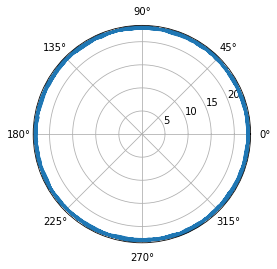

In [88]:
#New calculation of the ro and theta coordinates with the coordinates origin correction 
t["r"] = np.sqrt(t.x0**2 + t.y0**2)
t["theta"] = np.arctan2(t.y0,t.x0)

#Calculus of theta_prime (potential landscape reference system)
omega = 0.54
t["theta_prime"] = np.mod(np.unwrap(t.theta)-omega*t.time,2*np.pi) #np.mod = modulus

plt.polar(t.theta_prime,t.r)

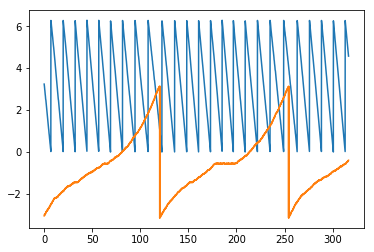

In [89]:
plt.plot(t.time, t.theta_prime)
plt.plot(t.time, t.theta)

In [90]:
t.head()

,time,x,y,x0,y0,r,theta,theta_prime
0,0.000,35.695500,45.008036,-23.015065,-2.264313,23.126183,-3.043524,3.239661
1,0.067,35.643877,44.622849,-23.066688,-2.649500,23.218353,-3.027231,3.219774
2,0.133,35.752357,44.128821,-22.958207,-3.143528,23.172420,-3.005515,3.205850
3,0.200,35.811922,43.750493,-22.898642,-3.521856,23.167894,-2.988987,3.186199
4,0.267,35.950727,43.552484,-22.759838,-3.719865,23.061822,-2.979585,3.159420


## Ring Radius

In [91]:
radius = t.r.mean()#*0.1805 #0.1805 um/px
radius

22.974776109741438

## Angular velocity

From the tracking of the test we have performed we have been able to obtain the position of the particle, and with the information of the timestamps of each frame, we are able to extract also its velocity. 
This information is referred to the reference system of an external viewer. Nevertheless, we are more interested about the movement of the particle from the optical tweezer ring reference system (e.g. the particle's relative movement from the potential landscape point of view).

Because of this, we need a change of variable from the variable theta (e.g. from external viewer) to theta_prime (e.g. potential landscape reference system, $\theta ' = \theta - t \omega_{twz}$ ) as it has been mentioned in above. This leads to the so mentioned movement equation of the particle in this system:

$$ \left<\dot{\theta'} \right>_{\Delta t} = - \frac{1}{\xi \rho^2} \left<\frac{\partial U}{\partial \theta '}\right>_{\Delta t} - \frac{1}{\xi}\left< F_D \right>_{\Delta t} $$

Where $F_{drag} = \omega_{twz} \xi$, which acts as the driving force.

So, if we plot the velocity in the new reference system, $\dot{\theta'}$, in front of $\theta '$ we are going to see the form of the potential landscape derivative.

In [92]:
t["theta_prime_unwrap"] = np.unwrap(t.theta_prime)
t["d_theta_prime"] = t.theta_prime_unwrap.diff()

t["theta_dot_prime"] = t.d_theta_prime/t.time.diff()
t.head()

,time,x,y,x0,y0,r,theta,theta_prime,theta_prime_unwrap,d_theta_prime,theta_dot_prime
0,0.000,35.695500,45.008036,-23.015065,-2.264313,23.126183,-3.043524,3.239661,3.239661,NaN,NaN
1,0.067,35.643877,44.622849,-23.066688,-2.649500,23.218353,-3.027231,3.219774,3.219774,-0.019887,-0.296819
2,0.133,35.752357,44.128821,-22.958207,-3.143528,23.172420,-3.005515,3.205850,3.205850,-0.013924,-0.210965
3,0.200,35.811922,43.750493,-22.898642,-3.521856,23.167894,-2.988987,3.186199,3.186199,-0.019652,-0.293309
4,0.267,35.950727,43.552484,-22.759838,-3.719865,23.061822,-2.979585,3.159420,3.159420,-0.026779,-0.399682


### Softening

Now we have calculated the angular velocity (e.g. $\dot{\theta'}$ ), we are going to do the mean of the velocities for each $\theta '$ to obtain a softened curve to work with. We are going to set up bins of a certain range of $\theta '$ and do the mean of the aparticles features inside these ranges. 

In [93]:
theta_bins = np.linspace(0,2*np.pi,1000)
t["bins"] = pd.cut(t.theta_prime,theta_bins)
t_grouped = t.groupby("bins").mean()
t.head() 

,time,x,y,x0,y0,r,theta,theta_prime,theta_prime_unwrap,d_theta_prime,theta_dot_prime,bins
0,0.000,35.695500,45.008036,-23.015065,-2.264313,23.126183,-3.043524,3.239661,3.239661,NaN,NaN,"(3.239, 3.245]"
1,0.067,35.643877,44.622849,-23.066688,-2.649500,23.218353,-3.027231,3.219774,3.219774,-0.019887,-0.296819,"(3.214, 3.22]"
2,0.133,35.752357,44.128821,-22.958207,-3.143528,23.172420,-3.005515,3.205850,3.205850,-0.013924,-0.210965,"(3.201, 3.208]"
3,0.200,35.811922,43.750493,-22.898642,-3.521856,23.167894,-2.988987,3.186199,3.186199,-0.019652,-0.293309,"(3.182, 3.189]"
4,0.267,35.950727,43.552484,-22.759838,-3.719865,23.061822,-2.979585,3.159420,3.159420,-0.026779,-0.399682,"(3.157, 3.164]"


In [94]:
t_grouped

,time,x,y,x0,y0,r,theta,theta_prime,theta_prime_unwrap,d_theta_prime,theta_dot_prime
bins,,,,,,,,,,,
"(0.0, 0.00629]",175.333500,67.321265,38.209323,8.610701,-9.063026,22.906738,-1.136142,0.002344,-83.249861,-0.043362,-0.647190
"(0.00629, 0.0126]",148.133500,56.380168,26.680517,-2.330397,-20.591831,23.012379,-1.681576,0.007743,-69.107295,-0.047603,-0.710494
"(0.0126, 0.0189]",128.933400,69.508240,35.540955,10.797675,-11.731393,22.944662,-0.731855,0.015785,-60.302794,-0.048010,-0.718832
"(0.0189, 0.0252]",178.955500,55.044558,40.294038,-3.666006,-6.978311,23.020858,-0.730601,0.022801,-84.800200,-0.049580,-0.745714
"(0.0252, 0.0314]",197.760000,63.902162,47.161112,5.191598,-0.111236,22.990272,0.003306,0.027056,-94.220723,-0.049716,-0.746660
"(0.0314, 0.0377]",56.733000,75.609825,31.695800,16.899261,-15.576549,22.982904,-0.744691,0.035415,-25.097326,-0.049743,-0.753683
"(0.0377, 0.044]",184.816500,75.370392,33.507614,16.659828,-13.764735,22.938094,-0.688735,0.041319,-87.923275,-0.048413,-0.725158
"(0.044, 0.0503]",95.666500,57.845196,40.625857,-0.865368,-6.646492,22.838873,-1.698812,0.048353,-43.933944,-0.050360,-0.756925
"(0.0503, 0.0566]",135.600000,46.637951,27.672275,-12.072613,-19.600074,23.019794,-2.122859,0.051364,-62.780489,-0.054224,-0.809310


Text(0, 0.5, 'Theta dot prime (rad/s)')

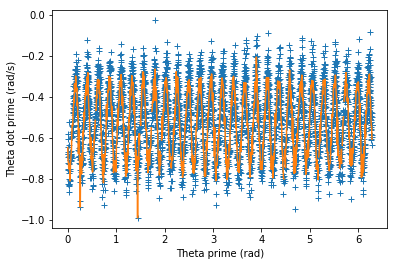

In [95]:
plt.plot(t.theta_prime, t.theta_dot_prime,'+')
plt.plot(t_grouped.theta_prime,t_grouped.theta_dot_prime)
plt.xlabel("Theta prime (rad)")
plt.ylabel("Theta dot prime (rad/s)")

## Integration of velocity

Now we have obtained the angular velocity plot, and hence the potential landscape derivative, we need to integrate it to obtain the potential landscape expression with an offset term introduced by the drag force. If the movement equation is integrated we obtain the following expression:

$$\int \dot{\theta '} d\theta = -\frac{1}{\xi}\left[\frac{U}{\rho ^2} + F_{drag} \theta \right]$$

The, if we plot the integral of the particle's velocity in the reference system of the optical traps in front of the coordinates in the same reference system, we are going to see the potential landscape with an offset produced by the drag force influence. Finally, if we substract this offset we are going to see the potential landscape shape  the particle feels .

In practice, we are going to follow the trapezoidal integration method provided by scipy and plot the result in front of $\theta '$. This method is preferred than the Simpson's because it takes less computation time and also it only needs two points to calculate one integral while the Simpson's method needs three points.

lin fit slope =  0.5331301413648194 lin fit ind term =  0.007132042750761744


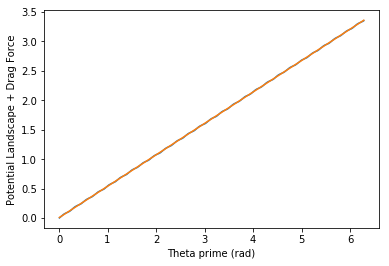

In [96]:
import scipy.integrate as scint

#interpolate the points where is no data to avoid problems integrating the function
theta_dot_prime_interpol = t_grouped["theta_dot_prime"].interpolate()
theta_prime_interpol = t_grouped["theta_prime"].interpolate()

I_trap = scint.cumtrapz(-theta_dot_prime_interpol, theta_prime_interpol)

x = np.array(theta_prime_interpol[1:])
data = np.array(I_trap)
lin_fit_trap = np.polyfit(x, data, 1)

rect = np.polyval(lin_fit_trap, x)

plt.plot(x, data)
plt.plot(x, rect)

plt.xlabel("Theta prime (rad)")
plt.ylabel("Potential Landscape + Drag Force")
#plt.xlim(-0.1,1)
#plt.ylim(-0.1,1)
print("lin fit slope = ", lin_fit_trap[0], "lin fit ind term = ", lin_fit_trap[1])

Text(0.5, 0, 'theta prime (rad)')

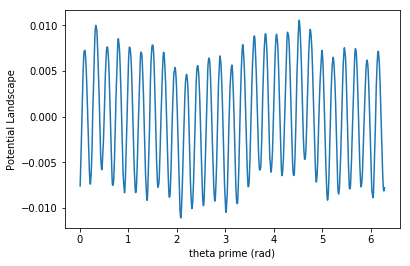

In [97]:
I_sim_rect = data-rect

plt.plot(x, I_sim_rect)#[:250])
plt.ylabel("Potential Landscape")
plt.xlabel("theta prime (rad)")

Now we are going to fit a sinusoidal function to the obtained curve. 
To do this, we are going to estimate the parameters of the sinusoidal function and, then, an optimization of the estimation will be performed.
This estimation has been done based on an answer from stackoverflow.

fit values: Amplitude =  0.00777058615339389 ; Frequency =  27.004906197899675 ; Phase =  -1.2166687157708895 ; Mean =  -4.3454996893206593e-16


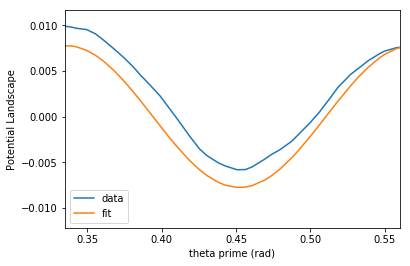

In [101]:
#estimation of the sinusoidal function prameters 
guess_mean = np.mean(I_sim_rect)
guess_std = 3*np.std(I_sim_rect)/(2**0.5)
guess_phase = 0
guess_freq = 27
guess_amp = 0.005

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(guess_freq*x+guess_phase) #+ guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda y: y[0]*np.sin(y[1]*x+y[2]) + y[3] - I_sim_rect
est_amp, est_freq, est_phase, est_mean = opt.leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*x+est_phase) + est_mean

print('fit values: Amplitude = ', est_amp, '; Frequency = ', est_freq, '; Phase = ', est_phase, '; Mean = ', est_mean)

plt.plot(x, I_sim_rect, label='data')#[:250])
plt.plot(x, data_fit, label='fit')
#plt.plot(t_grouped["theta_prime"][:len(I_sim_rect)], data_first_guess, '-', label='guess fit')
plt.ylabel("Potential Landscape")
plt.xlabel("theta prime (rad)")
plt.xlim(0.335, 0.56)
plt.legend()

**NOTE:** The next two cells are used to save the obtained data into a .csv file. Uncoment when necessary and comment again to do not execute without knowledge

In [102]:
#insert one extra value to match the dimension of the DataFrame with the vectors 
t_grouped["theta_prime_interpol"] = theta_prime_interpol
t_grouped["theta_dot_prime_interpol"] = theta_dot_prime_interpol

new_I = np.insert(I_trap, 0, 0)
t_grouped["theta_dot_prime_integral"] = new_I

#new_rect = np.insert(np.array(I_sim_rect), 0, 0) #The variable I_sim_rect has to be parsed to a numpy.array variable

pre_array = np.zeros((len(t_grouped)-len(I_sim_rect)))
Gsize_array = np.concatenate((np.array(I_sim_rect), pre_array))

completeFit = np.concatenate((np.array(data_fit), pre_array))

t_grouped["potential_landscape"]= Gsize_array
t_grouped["data_fit"] = completeFit

t_grouped

,time,x,y,x0,y0,r,theta,theta_prime,theta_prime_unwrap,d_theta_prime,theta_dot_prime,theta_prime_interpol,theta_dot_prime_interpol,theta_dot_prime_integral,potential_landscape,data_fit
bins,,,,,,,,,,,,,,,,
"(0.0, 0.00629]",175.333500,67.321265,38.209323,8.610701,-9.063026,22.906738,-1.136142,0.002344,-83.249861,-0.043362,-0.647190,0.002344,-0.647190,0.000000,-0.007595,-0.006570
"(0.00629, 0.0126]",148.133500,56.380168,26.680517,-2.330397,-20.591831,23.012379,-1.681576,0.007743,-69.107295,-0.047603,-0.710494,0.007743,-0.710494,0.003665,-0.006135,-0.005522
"(0.0126, 0.0189]",128.933400,69.508240,35.540955,10.797675,-11.731393,22.944662,-0.731855,0.015785,-60.302794,-0.048010,-0.718832,0.015785,-0.718832,0.009412,-0.004738,-0.004394
"(0.0189, 0.0252]",178.955500,55.044558,40.294038,-3.666006,-6.978311,23.020858,-0.730601,0.022801,-84.800200,-0.049580,-0.745714,0.022801,-0.745714,0.014550,-0.003832,-0.003630
"(0.0252, 0.0314]",197.760000,63.902162,47.161112,5.191598,-0.111236,22.990272,0.003306,0.027056,-94.220723,-0.049716,-0.746660,0.027056,-0.746660,0.017725,-0.002017,-0.002000
"(0.0314, 0.0377]",56.733000,75.609825,31.695800,16.899261,-15.576549,22.982904,-0.744691,0.035415,-25.097326,-0.049743,-0.753683,0.035415,-0.753683,0.023995,-0.000799,-0.000782
"(0.0377, 0.044]",184.816500,75.370392,33.507614,16.659828,-13.764735,22.938094,-0.688735,0.041319,-87.923275,-0.048413,-0.725158,0.041319,-0.725158,0.028361,0.000663,0.000691
"(0.044, 0.0503]",95.666500,57.845196,40.625857,-0.865368,-6.646492,22.838873,-1.698812,0.048353,-43.933944,-0.050360,-0.756925,0.048353,-0.756925,0.033574,0.001416,0.001318
"(0.0503, 0.0566]",135.600000,46.637951,27.672275,-12.072613,-19.600074,23.019794,-2.122859,0.051364,-62.780489,-0.054224,-0.809310,0.051364,-0.809310,0.035932,0.003383,0.003035


In [103]:
#Save to .csv file :)
t_grouped.to_csv("Results_Test56_20191128.csv", sep='\t')